# Importing Libraries

In [45]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

### Test set Image Processing

In [48]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)
class_name = validation_set.class_names
print(class_name)

Found 17572 files belonging to 38 classes.
['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Tw

### Loading Model

In [51]:
cnn = tf.keras.models.load_model('trained_model.h5')

### Visualising and Performing Prediction on Single image

In [54]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


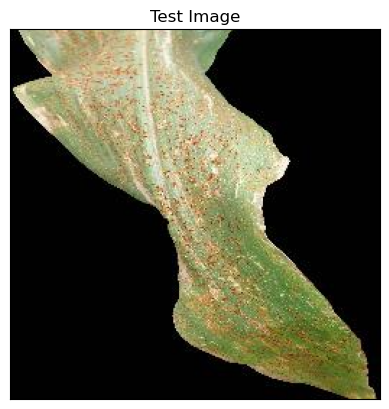

In [56]:
#Test Image Visualization
import cv2
image_path = 'test/test/CornCommonRust3.JPG'
# Reading an image in default mode
img = cv2.imread(image_path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) #Converting BGR to RGB
# Displaying the image 
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()

### Testing Model

In [59]:
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(128,128))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
predictions = cnn.predict(input_arr)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


In [61]:
print(predictions)

[[3.8396822e-24 9.7592546e-25 2.4427474e-23 1.8696381e-28 1.7845530e-27
  1.5548108e-28 1.6799955e-30 6.6552065e-18 1.0000000e+00 2.0554946e-22
  6.5612113e-24 7.4321063e-31 5.4187784e-27 6.6294218e-30 4.1881933e-31
  6.8840247e-29 4.2432934e-29 2.3893077e-27 5.2844590e-26 1.6949073e-26
  2.6742222e-21 1.9663160e-32 1.5584873e-27 1.8333053e-31 4.2452600e-33
  2.1703160e-28 3.5582291e-25 1.5684493e-32 1.0811377e-31 3.0915743e-24
  4.2670257e-21 1.9009520e-34 1.3095460e-29 8.2155273e-37 4.1246776e-31
  4.9672319e-31 5.5672951e-34 2.6857957e-28]]


In [63]:
result_index = np.argmax(predictions) #Return index of max element
print(result_index)

8


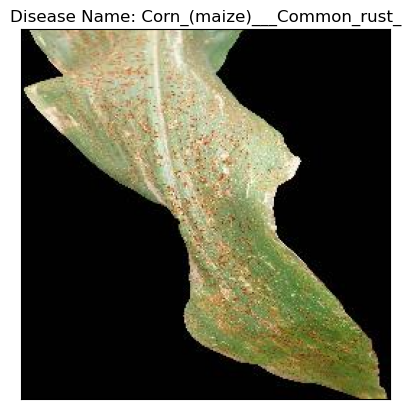

In [65]:
# Displaying the disease prediction
model_prediction = class_name[result_index]
plt.imshow(img)
plt.title(f"Disease Name: {model_prediction}")
plt.xticks([])
plt.yticks([])
plt.show()
